## Model

In [37]:
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline



df=pd.read_csv('data/preprocess.csv')

y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)


cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y','playoffs','home_play']

cont_ftrs1 = ['shot_distance', 'time_remaining']

X[cont_ftrs1] = X[cont_ftrs1].astype(float)
y = y.astype(float)

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# one-hot encoder

ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(X[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)

#ss = StandardScaler()
#count_values = ss.fit_transform(X[cont_ftrs1])
#df_cont1 = pd.DataFrame(data=count_values,columns = cont_ftrs1)


X_process = pd.concat([df_cat,X[cont_ftrs1]],axis=1)

ss = StandardScaler()
X_process[cont_ftrs1] = ss.fit_transform(X_process[cont_ftrs1])

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_process, y, 
                                                    test_size=0.20, random_state=50)



In [41]:


# standard scaler
scaler = StandardScaler()
X_train[cont_ftrs1] = scaler.fit_transform(X_train[cont_ftrs1])
X_test[cont_ftrs1] = scaler.transform(X_test[cont_ftrs1])

#df_cont1 = pd.DataFrame(data=cont_values,columns = cont_ftrs1)


#X_test_process = pd.concat([df_cat,df_cont1],axis=1)

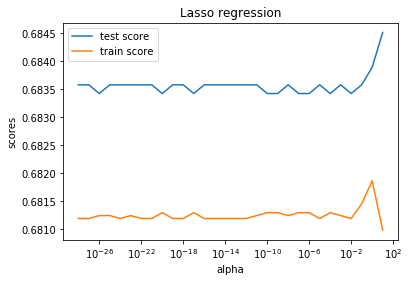

Best test score 0.6845136186770429
alpha: [10.]


In [29]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# best alpha
alpha = np.logspace(-28,1,30)
#thetas = []
scores_train = []
scores_test = []
        
    
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = LogisticRegression(penalty='l1',C=1/alpha[i], solver='liblinear', max_iter=1000000)
    clf = lin_reg.fit(X_train, y_train)
    #thetas.append(lin_reg.coef_)
    scores_test.append(clf.score(X_test, y_test))
    scores_train.append(clf.score(X_train, y_train))
    
plt.plot(alpha,scores_test, label='test score')
plt.plot(alpha,scores_train, label='train score')
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('scores')
plt.legend()
plt.title('Lasso regression')
plt.show()


# Best test score and corresponding alpha

winner = np.argwhere(scores_test == np.amax(scores_test))
winner = winner.flatten().tolist()

print("Best test score", scores_test[np.argmax(scores_test)])
print("alpha:", alpha[(np.array(winner)).tolist()])

In [186]:
np.logspace(-11,1,13)

array([1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04,
       1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
from sklearn.tree import DecisionTreeClassifier

min_samples_split = np.arange(2,100)
depth = np.linspace(1, 5, 1)
thetas = []
scores_train = []
scores_test = []
        

# Calculate the train and test accuracy scores for all combinations of n and depth. 
for i in range(len(min_samples_split)):
    for j in range(len(depth)):
           # load the linear regression model
            ran_cla = DecisionTreeClassifier(max_depth=depth[j],random_state=50,
                                             min_samples_split=min_samples_split[i])
            clf = ran_cla.fit(X_train, y_train)
            thetas.append(lin_reg.coef_)
            scores_test.append(clf.score(X_test, y_test))
            scores_train.append(clf.score(X_train, y_train))


# Best test score and corresponding n,depth

print(np.max(scores_test))
winner = np.argwhere(scores_test == np.amax(scores_test))
winner=winner.flatten().tolist()

print("min_samples_split:", min_samples_split[(np.array(winner)//len(depth)).tolist()])
print("depth:",depth[np.int_(np.round(np.array(winner)/len(depth) %1 *len(depth)))])

0.6605447470817121
min_samples_split: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
depth: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [2]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1',
                                                        solver='saga', max_iter=1000000, 
                                                        multi_class= 'multinomial'))])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__C': np.logspace(-3,3,7)
    }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [3]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'classifier__C': 1.0}
best CV score: 0.6797198034732694
test score: 0.6863813229571984
{'classifier__C': 1.0}
best CV score: 0.6804008366979618
test score: 0.6883268482490272
{'classifier__C': 0.1}
best CV score: 0.6815196769956706
test score: 0.6809338521400778
{'classifier__C': 1.0}
best CV score: 0.6823952911417036
test score: 0.6803501945525292
{'classifier__C': 1.0}
best CV score: 0.6811305151529893
test score: 0.6826848249027238
{'classifier__C': 0.1}
best CV score: 0.6819088388383518
test score: 0.6780155642023347
{'classifier__C': 0.1}
best CV score: 0.6811791603833244
test score: 0.6789883268482491
{'classifier__C': 1.0}
best CV score: 0.6804008366979618
test score: 0.685408560311284
{'classifier__C': 1.0}
best CV score: 0.68283309821472
test score: 0.6766536964980545
{'classifier__C': 0.1}
best CV score: 0.6799630296249453
test score: 0.685408560311284
test accuracy: 0.68 +/- 0.0


In [6]:
X=X[0:1000]
y=y[0:1000]

## SVC

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    #scaler = StandardScaler()
    pipe = make_pipeline(preprocessor,SVC())
    # the parameter(s) we want to tune
    param_grid = {'svc__C': np.logspace(0,5,num=6),'svc__gamma': np.logspace(-5,0,num=6)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [8]:
test_scores = []
for i in range(1):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'svc__C': 10.0, 'svc__gamma': 0.01}
best CV score: 0.6375
test score: 0.695
test accuracy: 0.695 +/- 0.0


In [4]:
X=X[0:1000]
y=y[0:1000]

## QDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    #scaler = StandardScaler()
    pipe = make_pipeline(preprocessor,LinearDiscriminantAnalysis())
    # the parameter(s) we want to tune
    param_grid = {'classify__tol': np.logspace(-10,0,num=11)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [20]:
test_scores = []
for i in range(1):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

ValueError: Invalid parameter classify for estimator Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['shot_distance', 'time_rema...None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

random_state = 50
processors=1
n_folds=5
num_instances=len(X)
scoring='accuracy'

kfold = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)

#validation_size = 0.20
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_process, y, 
                                                                #test_size=validation_size, 
                                                                #random_state=random_state)

In [16]:
#scaler = StandardScaler()
#X_process[cont_ftrs1] = scaler.fit_transform(X_process[cont_ftrs1])

In [42]:
# Prepare some basic models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_process, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))
    
results[4]=1-results[4]

LR: (0.682) +/- (0.004)
LDA: (0.682) +/- (0.004)
K-NN: (0.602) +/- (0.005)
CART: (0.585) +/- (0.006)
NB: (0.453) +/- (0.001)
SVC: (0.679) +/- (0.004)


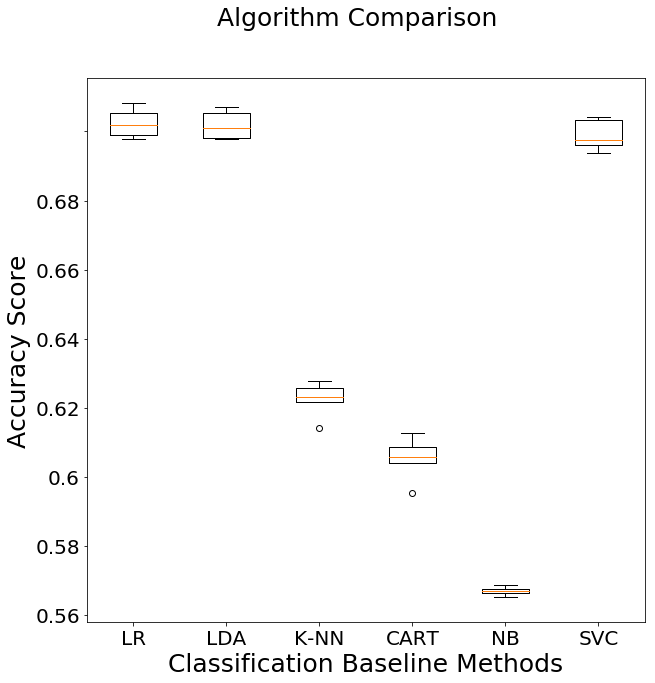

In [43]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10,10))
fig.suptitle('Algorithm Comparison',fontsize=25)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylabel('Accuracy Score',fontsize=25)
ax.set_xlabel('Classification Baseline Methods',fontsize=25)
ax.set_xticklabels(names,fontsize=20)
ax.set_yticklabels([0.54,0.56,0.58,0.60,0.62,0.64,0.66,0.68],fontsize=20)
plt.savefig('figures/Algorithm_Comparison.pdf',dpi=500,bbox_inches='tight')
plt.show()

## Ensemble

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

scoring = 'accuracy'
random_state = 50
n_folds=5

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=50)
	cv_results = cross_val_score(model, X_process, y, cv=kfold, scoring = make_scorer(accuracy_score))
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.681364 (0.003209)
GBM: 0.680897 (0.003450)
RF: 0.642215 (0.002290)
ET: 0.638168 (0.001871)


In [45]:
names.append('XGBoost')

In [46]:
results.append([0.685214,0.68338132295,0.6797665,0.6805447,0.68443579])

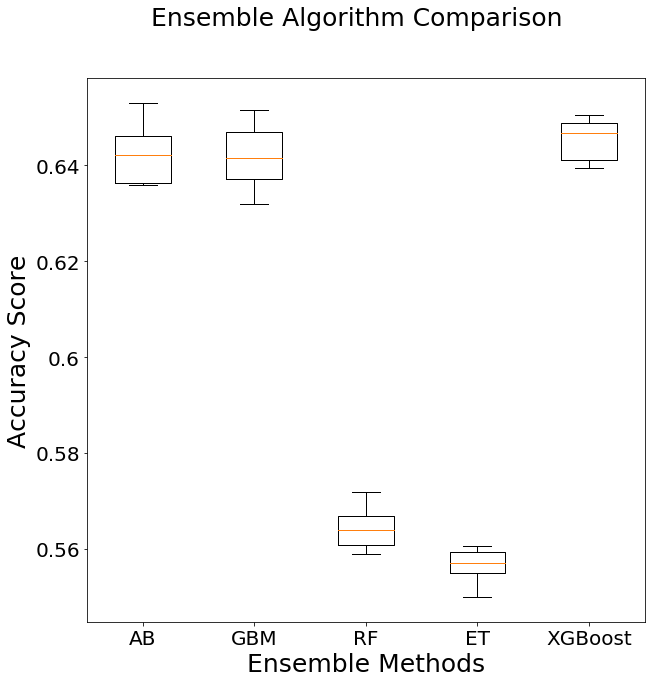

In [47]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Ensemble Algorithm Comparison',fontsize=25)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylabel('Accuracy Score',fontsize=25)
ax.set_xlabel('Ensemble Methods',fontsize=25)
ax.set_xticklabels(names,fontsize=20)
ax.set_yticklabels([0.54,0.56,0.58,0.60,0.62,0.64,0.66,0.68],fontsize=20)
plt.savefig('figures/Ensemble_Comparison.pdf',dpi=500,bbox_inches='tight')
plt.show()


## Tune RandomForest

In [71]:
#GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100,
                                                            random_state=random_state))])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__max_features': ['sqrt','log2'],
        'classifier__min_samples_split': np.arange(2,10),
        }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [72]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'classifier__max_features': 'log2', 'classifier__min_samples_split': 9}
best CV score: 0.6743201829060661
test score: 0.6706225680933852
test accuracy: 0.671 +/- 0.0


## AdaBoost

In [ ]:


#GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100,
                                                            random_state=random_state))])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__max_features': ['sqrt','log2'],
        'classifier__min_samples_split': np.linspace(0,1,11),
        }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)



In [ ]:
test_scores = []
for i in range(1):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

## Tree

(5140, 187) (20557, 187) (5140,) (20557,)


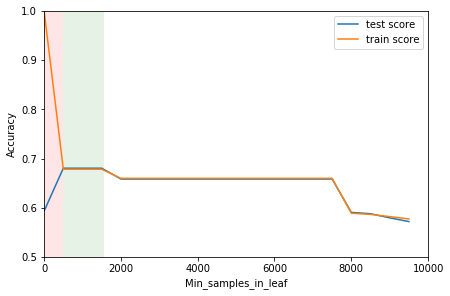

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics

r = np.arange(1, 10000, 500)
a=[]
b=[]

print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)


for i in r:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i, class_weight='balanced')
    clf = clf.fit(X_train, y_train)
    a.append(clf.score(X_test, y_test))
    b.append(clf.score(X_train, y_train)) #This is done solely for visualising the overfitting effect, evaluating against training data is not part of the analysis
    
#plt.figure(figsize=(8, 5))


plt.plot(r, a, label='test score')
plt.plot(r, b, label='train score')

plt.tight_layout()

#Retroactively marked for visualisation purposes:
plt.axvspan(0, 500, color='r', alpha=0.1, lw=0) 
plt.axvspan(500, 1550, color='g', alpha=0.1, lw=0)
#---
plt.legend()
plt.xlabel("Min_samples_in_leaf")
plt.ylabel('Accuracy')
plt.xlim(0, 10000)
plt.ylim(0.5,1)
plt.savefig('figures/min_leaf_tree.png',dpi=500,bbox_inches='tight')
plt.show()

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1750, class_weight='balanced')
clf = clf.fit(X_train, y_train)

In [13]:
from sklearn.externals.six import StringIO
with open("kobe3.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=X_train.columns, class_names=True, filled=True, rounded=True, special_characters=True) 

In [14]:
tree.plot_tree(clf)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'